In [3]:
import bert_score
import json

In [4]:
# hide the loading messages
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.major.size"] = 0
rcParams["xtick.minor.size"] = 0
rcParams["ytick.major.size"] = 0
rcParams["ytick.minor.size"] = 0

rcParams["axes.labelsize"] = "large"
rcParams["axes.axisbelow"] = True
rcParams["axes.grid"] = True

In [ ]:
/Users/varya/tu_wien/shroom-hackathon/data/SHROOM_trial-v1.1/trial-v1.json

In [6]:
file_path = "data/SHROOM_trial-v1.1/trial-v1.json"

In [7]:
from bert_score import score

In [8]:
with open(file_path) as f:
    trial_data = json.load(f)

In [9]:
trial_data[0]

{'hyp': 'A district of Kowloon, China.',
 'ref': 'tgt',
 'src': "The City <define> Chiuchow </define> is Kowloon 's other top restaurant and is famous for its goose dishes and other specialties from the Chiuchow region ( you may also wish to try the beef satay done in a creamy sauce ) .",
 'tgt': 'The Chaoshan region where the Teochew dialect is spoken.',
 'model': '',
 'task': 'DM',
 'labels': ['Hallucination', 'Hallucination', 'Hallucination'],
 'label': 'Hallucination',
 'p(Hallucination)': 1.0}

- a source (`src`), the input passed to the models for generation;
- a target (`tgt`), the intended reference "gold" text that the 
model ought to generate;
- a hypothesis (`hyp`), the actual model production

So, we need to compare a `tgt` (gold text) and predicted text `hyp`

In [10]:
len(trial_data)

80

In [11]:
tgts = []
for entry in trial_data:
    tgts.append(entry['tgt'])

In [12]:
hyps = []
for entry in trial_data:
    hyps.append(entry['hyp'])

In [13]:
P, R, F1 = score(hyps, tgts, lang='en', verbose=True)

calculating scores...
computing bert embedding.


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


computing greedy matching.


100%|██████████| 2/2 [00:00<00:00, 270.52it/s]

done in 2.04 seconds, 39.12 sentences/sec


In [14]:
F1

tensor([0.8570, 0.9072, 0.9003, 0.8987, 0.8933, 0.8748, 0.8640, 0.9005, 0.8755,
        0.8311, 0.9374, 0.9031, 0.8898, 0.8400, 0.8853, 0.8272, 0.8516, 0.8536,
        0.9556, 0.8494, 0.9412, 0.8363, 0.8657, 0.8566, 0.8673, 0.8821, 0.9611,
        0.9537, 0.8202, 0.8706, 0.8533, 0.9396, 1.0000, 0.8392, 0.8835, 0.9050,
        0.9411, 0.8857, 0.8790, 0.8399, 0.9027, 0.9141, 0.9300, 0.9321, 0.8781,
        0.9617, 0.9936, 0.9044, 0.9657, 0.9301, 0.9705, 0.9835, 0.9154, 0.9435,
        0.9914, 0.9735, 0.9137, 0.9121, 0.9605, 0.9568, 0.8881, 0.9796, 0.9747,
        0.9501, 0.9273, 0.9237, 1.0000, 0.9079, 0.9484, 0.9463, 0.9004, 0.9760,
        0.9943, 0.8939, 0.9340, 0.9576, 0.9634, 0.9379, 0.9386, 0.8502])

In [15]:
P, R, F1 = score(hyps, tgts, lang='en', rescale_with_baseline=True)

In [16]:
F1

tensor([ 1.5297e-01,  4.5029e-01,  4.0928e-01,  3.9998e-01,  3.6764e-01,
         2.5829e-01,  1.9432e-01,  4.1051e-01,  2.6214e-01, -6.7736e-04,
         6.2900e-01,  4.2611e-01,  3.4713e-01,  5.1699e-02,  3.2012e-01,
        -2.4127e-02,  1.2056e-01,  1.3272e-01,  7.3698e-01,  1.0742e-01,
         6.5158e-01,  3.0248e-02,  2.0436e-01,  1.5060e-01,  2.1360e-01,
         3.0115e-01,  7.6936e-01,  7.2562e-01, -6.5346e-02,  2.3306e-01,
         1.3101e-01,  6.4197e-01,  1.0000e+00,  4.7283e-02,  3.0990e-01,
         4.3704e-01,  6.5127e-01,  3.2264e-01,  2.8295e-01,  5.1145e-02,
         4.2330e-01,  4.9088e-01,  5.8498e-01,  5.9775e-01,  2.7786e-01,
         7.7295e-01,  9.6231e-01,  4.3357e-01,  7.9675e-01,  5.8560e-01,
         8.2522e-01,  9.0213e-01,  4.9847e-01,  6.6519e-01,  9.4908e-01,
         8.4314e-01,  4.8862e-01,  4.7925e-01,  7.6613e-01,  7.4420e-01,
         3.3706e-01,  8.7929e-01,  8.5002e-01,  7.0436e-01,  5.6897e-01,
         5.4816e-01,  1.0000e+00,  4.5422e-01,  6.9

In [17]:
float(1.5297e-01)

0.15297

In [18]:
F1[0]

tensor(0.1530)

In [19]:
bertscore_values = list(map(float, F1))

In [20]:
count = 0
for entry in trial_data:
    entry['bertscore'] = bertscore_values[count]
    count+=1

In [21]:
trial_data[10]

{'hyp': 'A person who has a pass.',
 'ref': 'tgt',
 'src': '<define> Passholders </define> can visit the theme park all year round .',
 'tgt': 'One who holds a pass.',
 'model': '',
 'task': 'DM',
 'labels': ['Not Hallucination', 'Not Hallucination', 'Not Hallucination'],
 'label': 'Not Hallucination',
 'p(Hallucination)': 0.0,
 'bertscore': 0.6289983987808228}

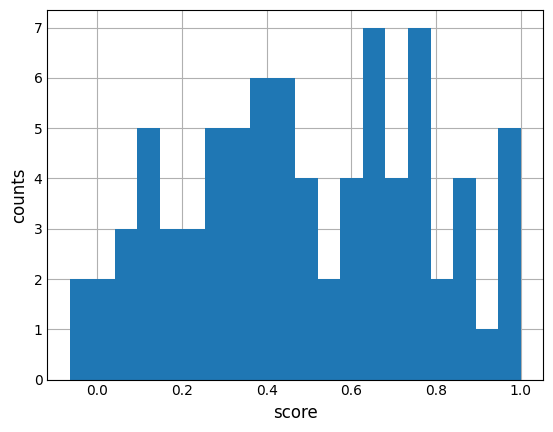

In [26]:
plt.hist(F1, bins=20)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [23]:
from bert_score import plot_example

In [27]:
hyps[0], tgts[0]

('A district of Kowloon, China.',
 'The Chaoshan region where the Teochew dialect is spoken.')

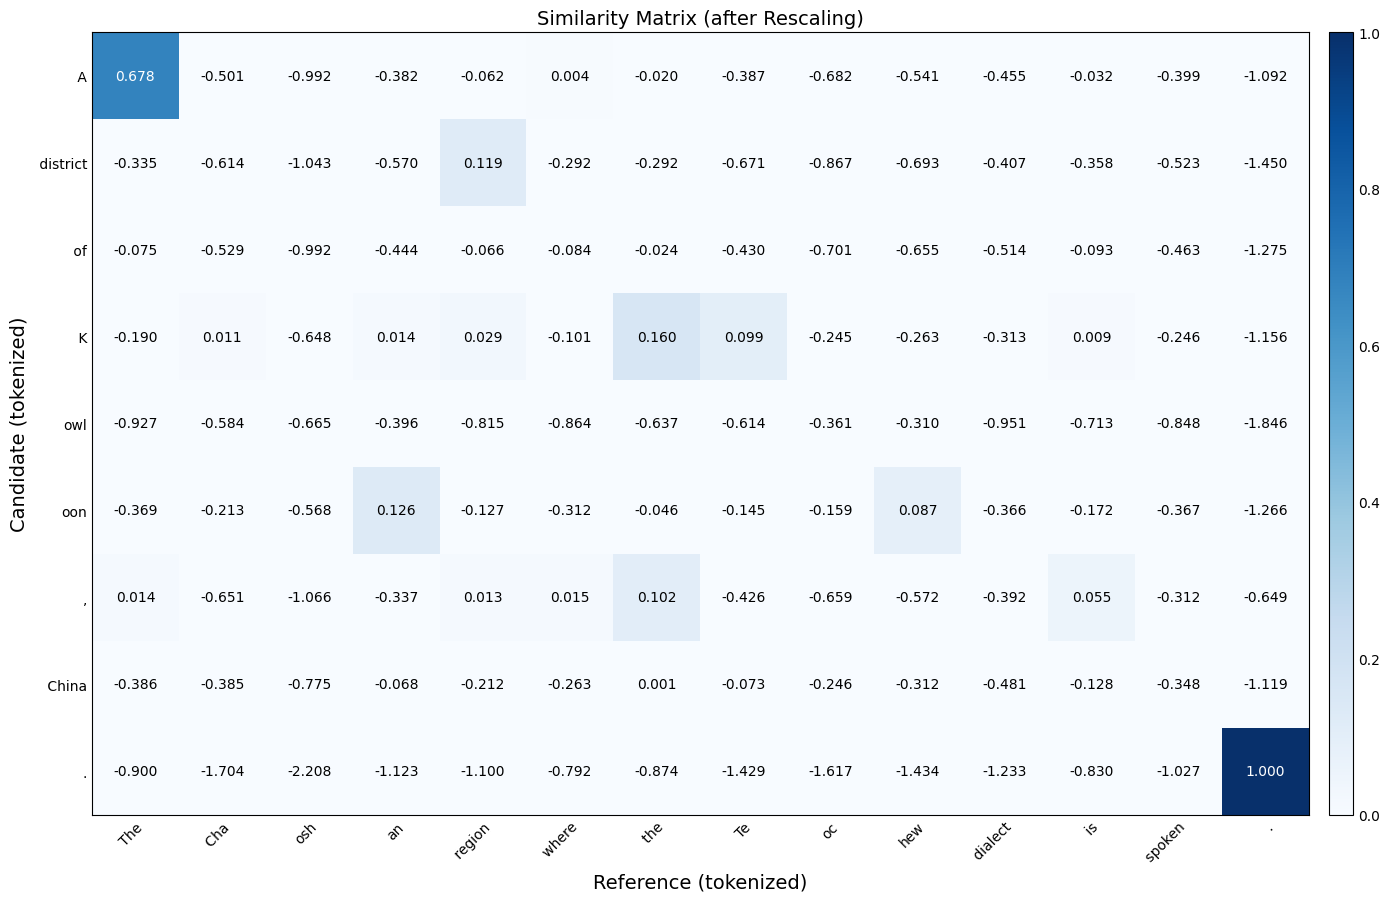

In [28]:
plot_example(hyps[0], tgts[0], lang="en", rescale_with_baseline=True)